# **Trabalho Prático 4, Fase 3 - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Aluno 1:** Giovanna Paranhos
### **Matrícula 1:** 2023655476
### **Aluno 2:** Samir Saliba
### **Matrícula 1:** 2022685118

### **Tema:** Regressão com dados de "Demanda de aluguel de bicicletas na cidade de Seoul"
### **Base de dados:** [UCI - Seoul Bike Sharing Demand](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)



#### Obs: Esse trabalho é baseado na engenharia reversa do trabalho feito por nós para a fase 2


In [21]:
import pandas as pd

df = pd.read_csv('data_tp4/SeoulBikeData.csv', encoding='unicode_escape')
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

## **1. Business Understanding**

Link para a sessão: [OpenAI](https://chat.openai.com/share/25fe820d-3306-4a44-a7d5-900319789825)

In [2]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Business Understanding:

The goal of this project is to predict the demand for bike sharing in the city of Seoul based on various features related to weather conditions, time of day, and holiday information. Bike sharing systems are becoming increasingly popular in urban areas, providing an eco-friendly and convenient mode of transportation for the public. Accurately predicting bike demand can help the city manage and optimize the bike sharing system, ensuring that there are enough bikes available to meet the demand and enhancing the overall user experience.

Key Objectives:
1. **Optimize Bike Availability:** By predicting bike demand, the city can optimize the distribution and availability of bikes at different locations and times, ensuring that users can easily access bikes when needed.

2. **Resource Planning:** Efficiently managing the resources, such as the number of bikes stationed at different locations, requires an understanding of the expected demand patterns. This can lead to cost savings and improved resource allocation.

3. **Enhance User Experience:** Predicting bike demand helps in providing a better user experience by minimizing instances of unavailability and ensuring that users can find and rent bikes conveniently.

4. **Operational Efficiency:** The insights gained from the prediction model can be used to plan operational activities, such as maintenance and redistribution of bikes, more effectively.

Data Mining Problem Definition:
The problem at hand is a regression task, where the objective is to predict the number of rented bikes based on various features. The target variable is 'Rented Bike Count,' and the features include temporal information (date and hour), weather-related variables (temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, snowfall), and categorical variables such as 'Seasons,' 'Holiday,' and 'Functioning Day.'

Preliminary Plan:
1. **Data Exploration:** Explore the dataset to understand the distribution of the target variable and features. Identify any missing or inconsistent data that may need to be addressed.

2. **Feature Engineering:** Create additional features if necessary, such as extracting information from the 'Date' column, encoding categorical variables, and normalizing numerical features.

3. **Data Preprocessing:** Handle missing values, outliers, and ensure the data is in a suitable format for modeling.

4. **Exploratory Data Analysis (EDA):** Conduct EDA to gain insights into the relationships between features and the target variable. Understand the impact of different factors on bike demand.

5. **Model Selection:** Choose regression models suitable for the task, considering algorithms like linear regression, decision trees, or ensemble methods.

6. **Model Training:** Split the dataset into training and testing sets, train the selected models on the training set, and evaluate their performance on the testing set.

7. **Evaluation:** Use appropriate evaluation metrics (e.g., Mean Squared Error, R-squared) to assess the performance of the models and fine-tune them if necessary.

8. **Deployment:** Once a satisfactory model is obtained, deploy it for real-time predictions, enabling the city to use the model to predict bike demand.

By following this plan, the project aims to provide actionable insights for the city of Seoul to optimize its bike sharing system and improve the overall efficiency and satisfaction of users.

Key Stakeholders Information:

1. **City of Seoul Transportation Department:**
   - *Interest:* The Transportation Department is a key stakeholder as they are responsible for the management and operation of the bike sharing system in the city. They are interested in optimizing bike availability, resource planning, and ensuring the overall success and efficiency of the bike sharing program.

2. **Bike Sharing Service Providers:**
   - *Interest:* Companies providing the bike sharing service have a direct interest in the accurate prediction of bike demand. They aim to enhance user experience, reduce operational costs, and improve the overall performance of the bike sharing system.

3. **City Planners and Urban Development Authorities:**
   - *Interest:* Urban planners and development authorities are concerned with sustainable and eco-friendly transportation options. Accurate bike demand predictions support city planning efforts, contributing to a more sustainable and efficient urban transportation infrastructure.

4. **Local Businesses and Tourism Board:**
   - *Interest:* Local businesses and the tourism board have a vested interest in promoting bike usage as it can contribute to a vibrant and active city atmosphere. Accurate predictions enable them to align their services and promotions with expected increases in bike demand during specific times or events.

5. **Citizens and Commuters:**
   - *Interest:* The general public, especially regular bike users, are stakeholders as they rely on the bike sharing system for their daily commute or recreational activities. Accurate predictions positively impact their experience by ensuring bike availability when needed.

6. **Environmental Organizations:**
   - *Interest:* Organizations focused on environmental sustainability have an interest in promoting eco-friendly modes of transportation. Bike sharing systems contribute to reducing carbon emissions, and accurate demand predictions align with the goals of such organizations.

7. **Data Science and Analytics Teams:**
   - *Interest:* The teams responsible for developing and maintaining the predictive model are crucial stakeholders. They are interested in leveraging data-driven insights to continuously improve the accuracy of demand predictions and contribute to the success of the bike sharing program.

8. **Government Regulatory Bodies:**
   - *Interest:* Regulatory bodies overseeing transportation services and public infrastructure have a regulatory interest in ensuring the smooth and compliant operation of the bike sharing system. Accurate demand predictions contribute to efficient regulatory oversight.

9. **Financial Stakeholders and Investors:**
   - *Interest:* Investors and financial stakeholders in the bike sharing service providers are concerned with the financial success of the program. Accurate demand predictions contribute to operational efficiency and can impact the financial performance of the service providers.

Understanding the interests and expectations of these key stakeholders is essential for the success of the predictive modeling project. Regular communication and collaboration with these stakeholders will ensure that the predictive model aligns with the overall objectives and needs of the various parties involved in the bike sharing ecosystem in Seoul.

## **2. Data understanding (Entendimento dos dados)**

Link para a sessão: [OpenAI](https://chat.openai.com/share/c24b6692-2a1d-4a8b-8bf3-a5c57b3289cf)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
############################## CODIGO DESCONSIDERADO
# # Load the data
# url = "your_dataset_url.csv"  # Replace with the actual URL or local path to your dataset
# df = pd.read_csv(url)

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# Display the first few rows of the dataset
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
# Summary statistics for numerical columns
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [7]:
# Check for missing values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Date: ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' 

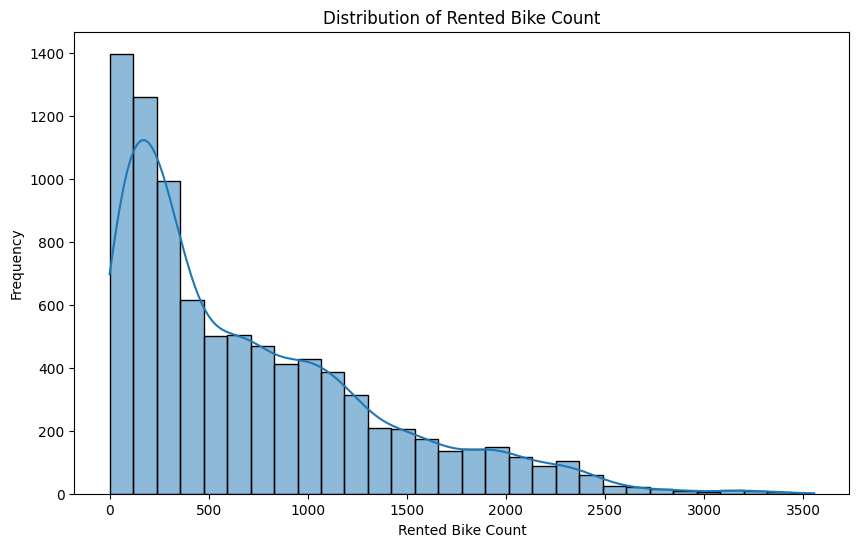

In [11]:
# Visualize the distribution of the target variable (Rented Bike Count)
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], bins=30, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

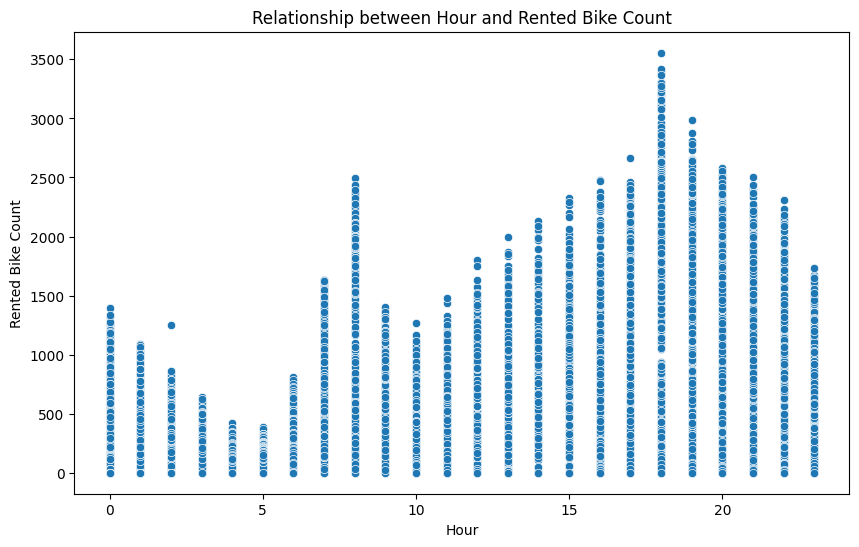

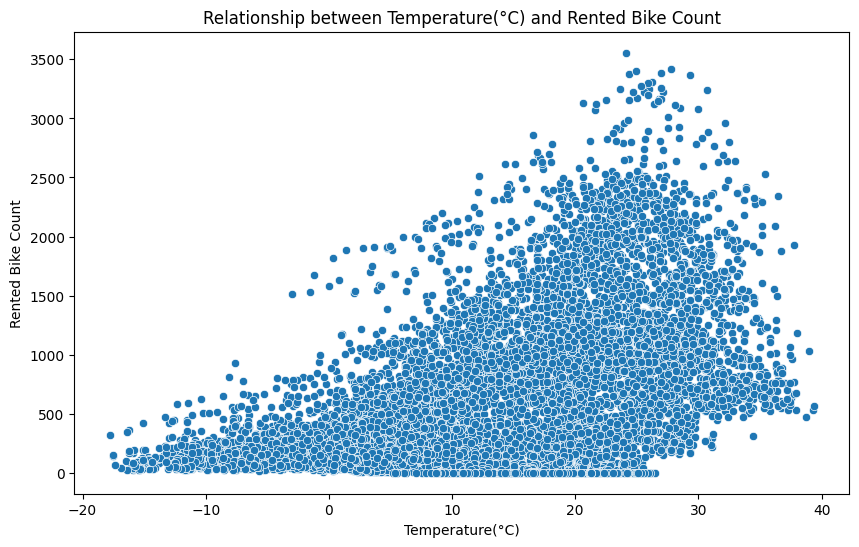

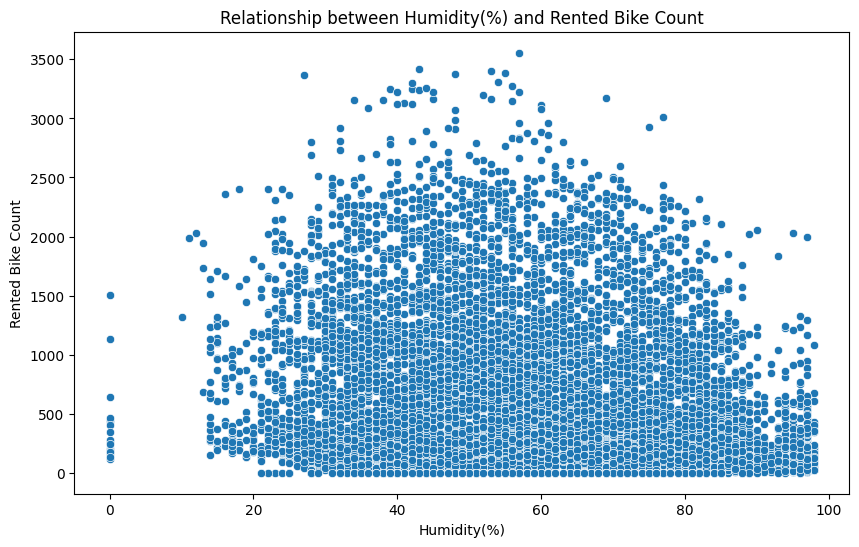

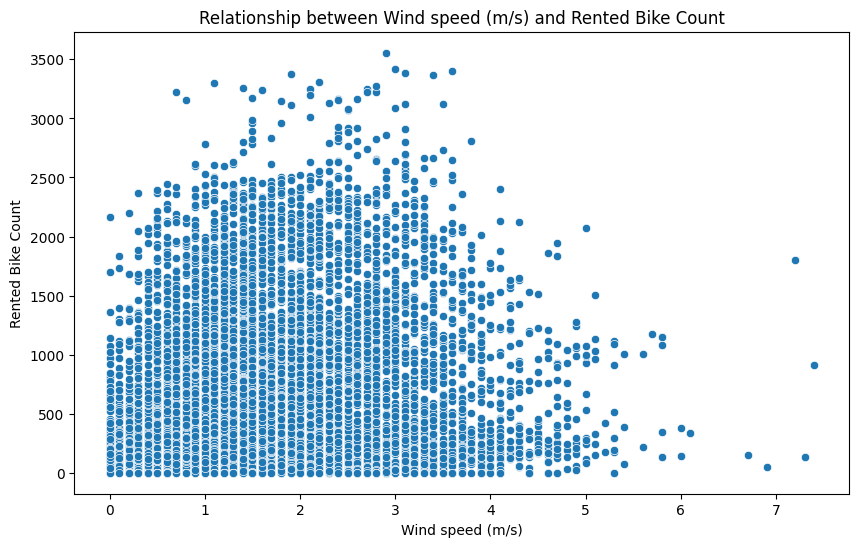

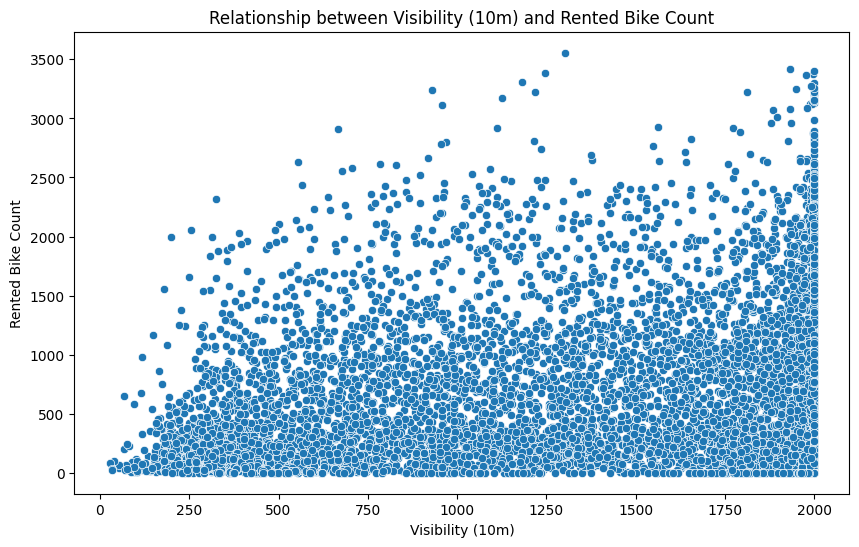

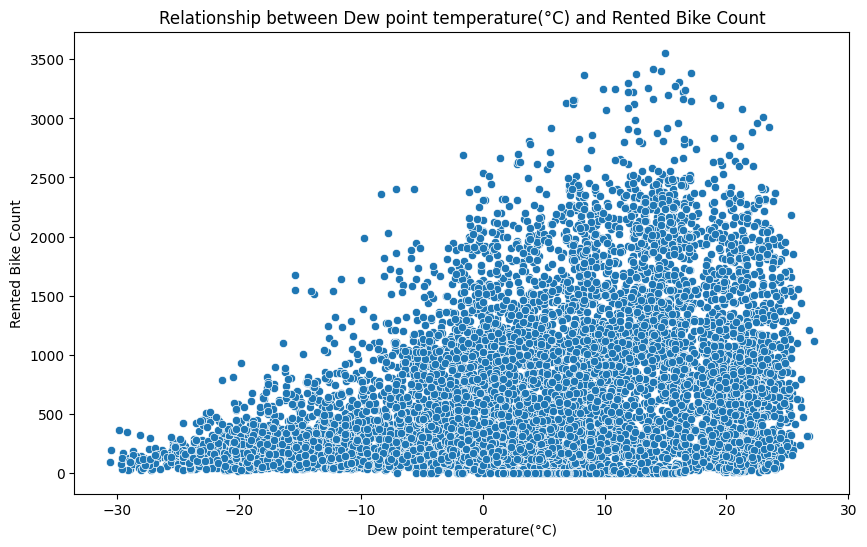

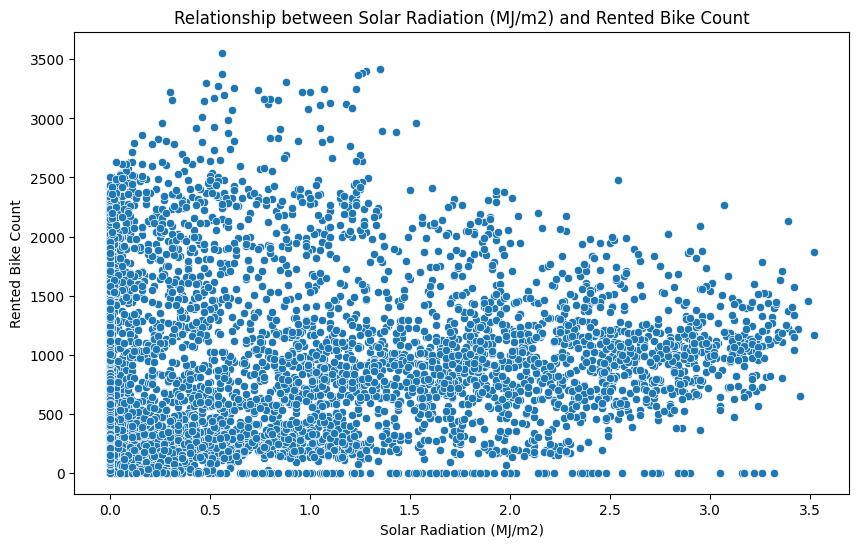

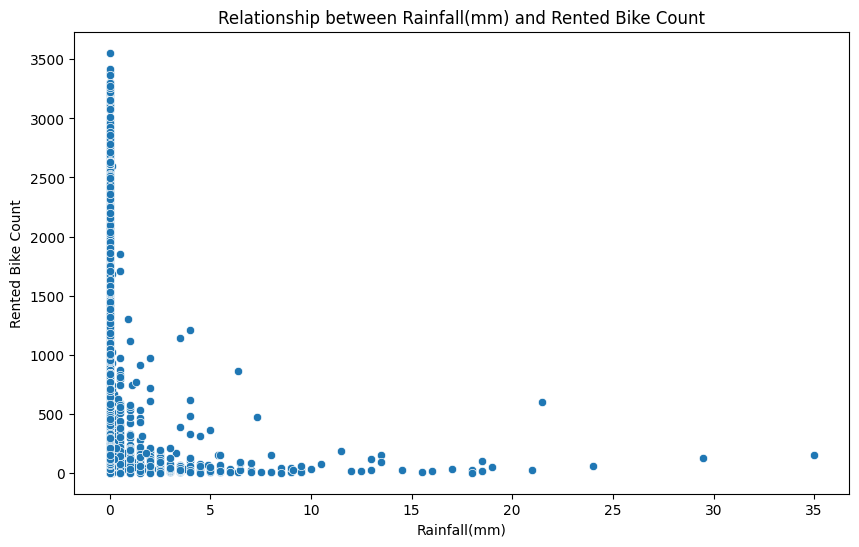

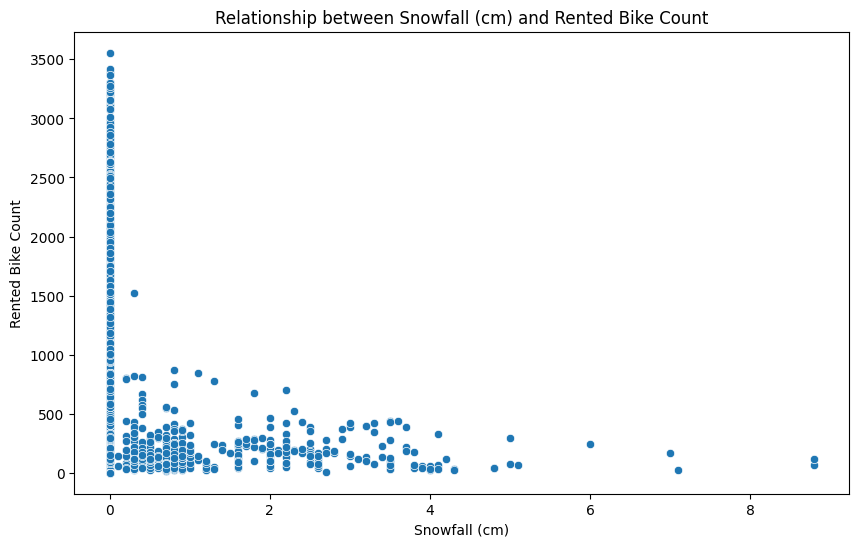

In [12]:
# Visualize relationships between numerical features and the target variable
numerical_features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
                       'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)',
                       'Rainfall(mm)', 'Snowfall (cm)']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y='Rented Bike Count')
    plt.title(f'Relationship between {feature} and Rented Bike Count')
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')
    plt.show()

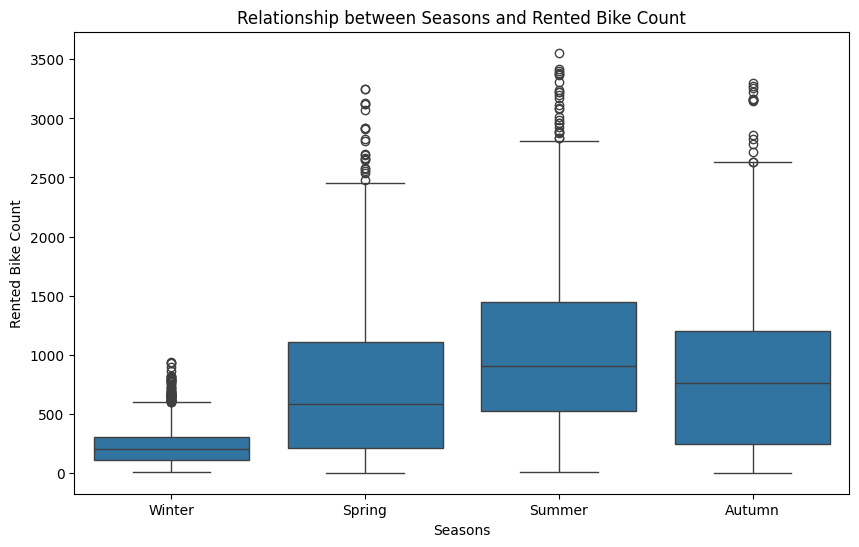

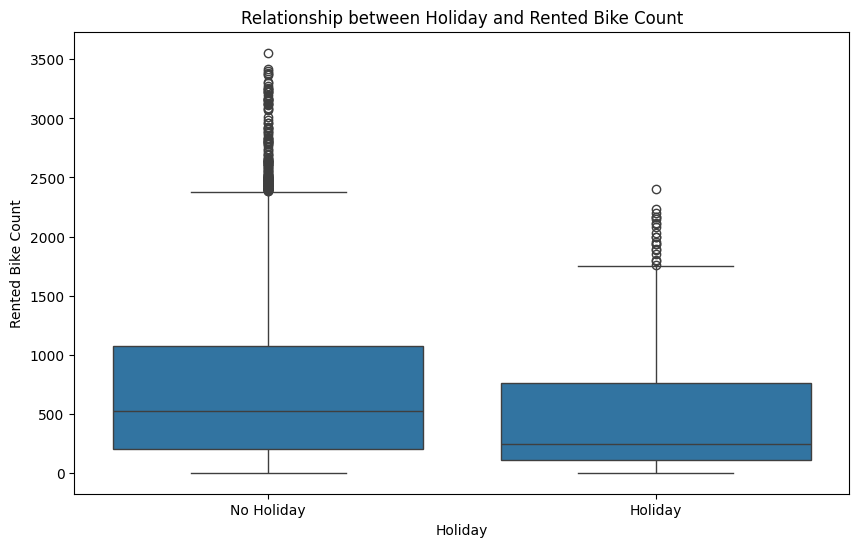

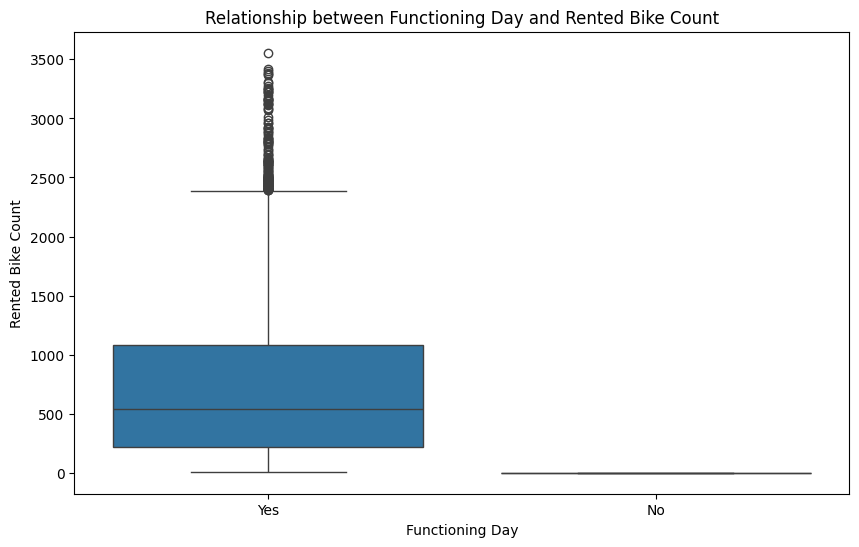

In [13]:
# Visualize relationships between categorical features and the target variable
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, y='Rented Bike Count')
    plt.title(f'Relationship between {feature} and Rented Bike Count')
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')
    plt.show()

<Figure size 1400x1000 with 0 Axes>

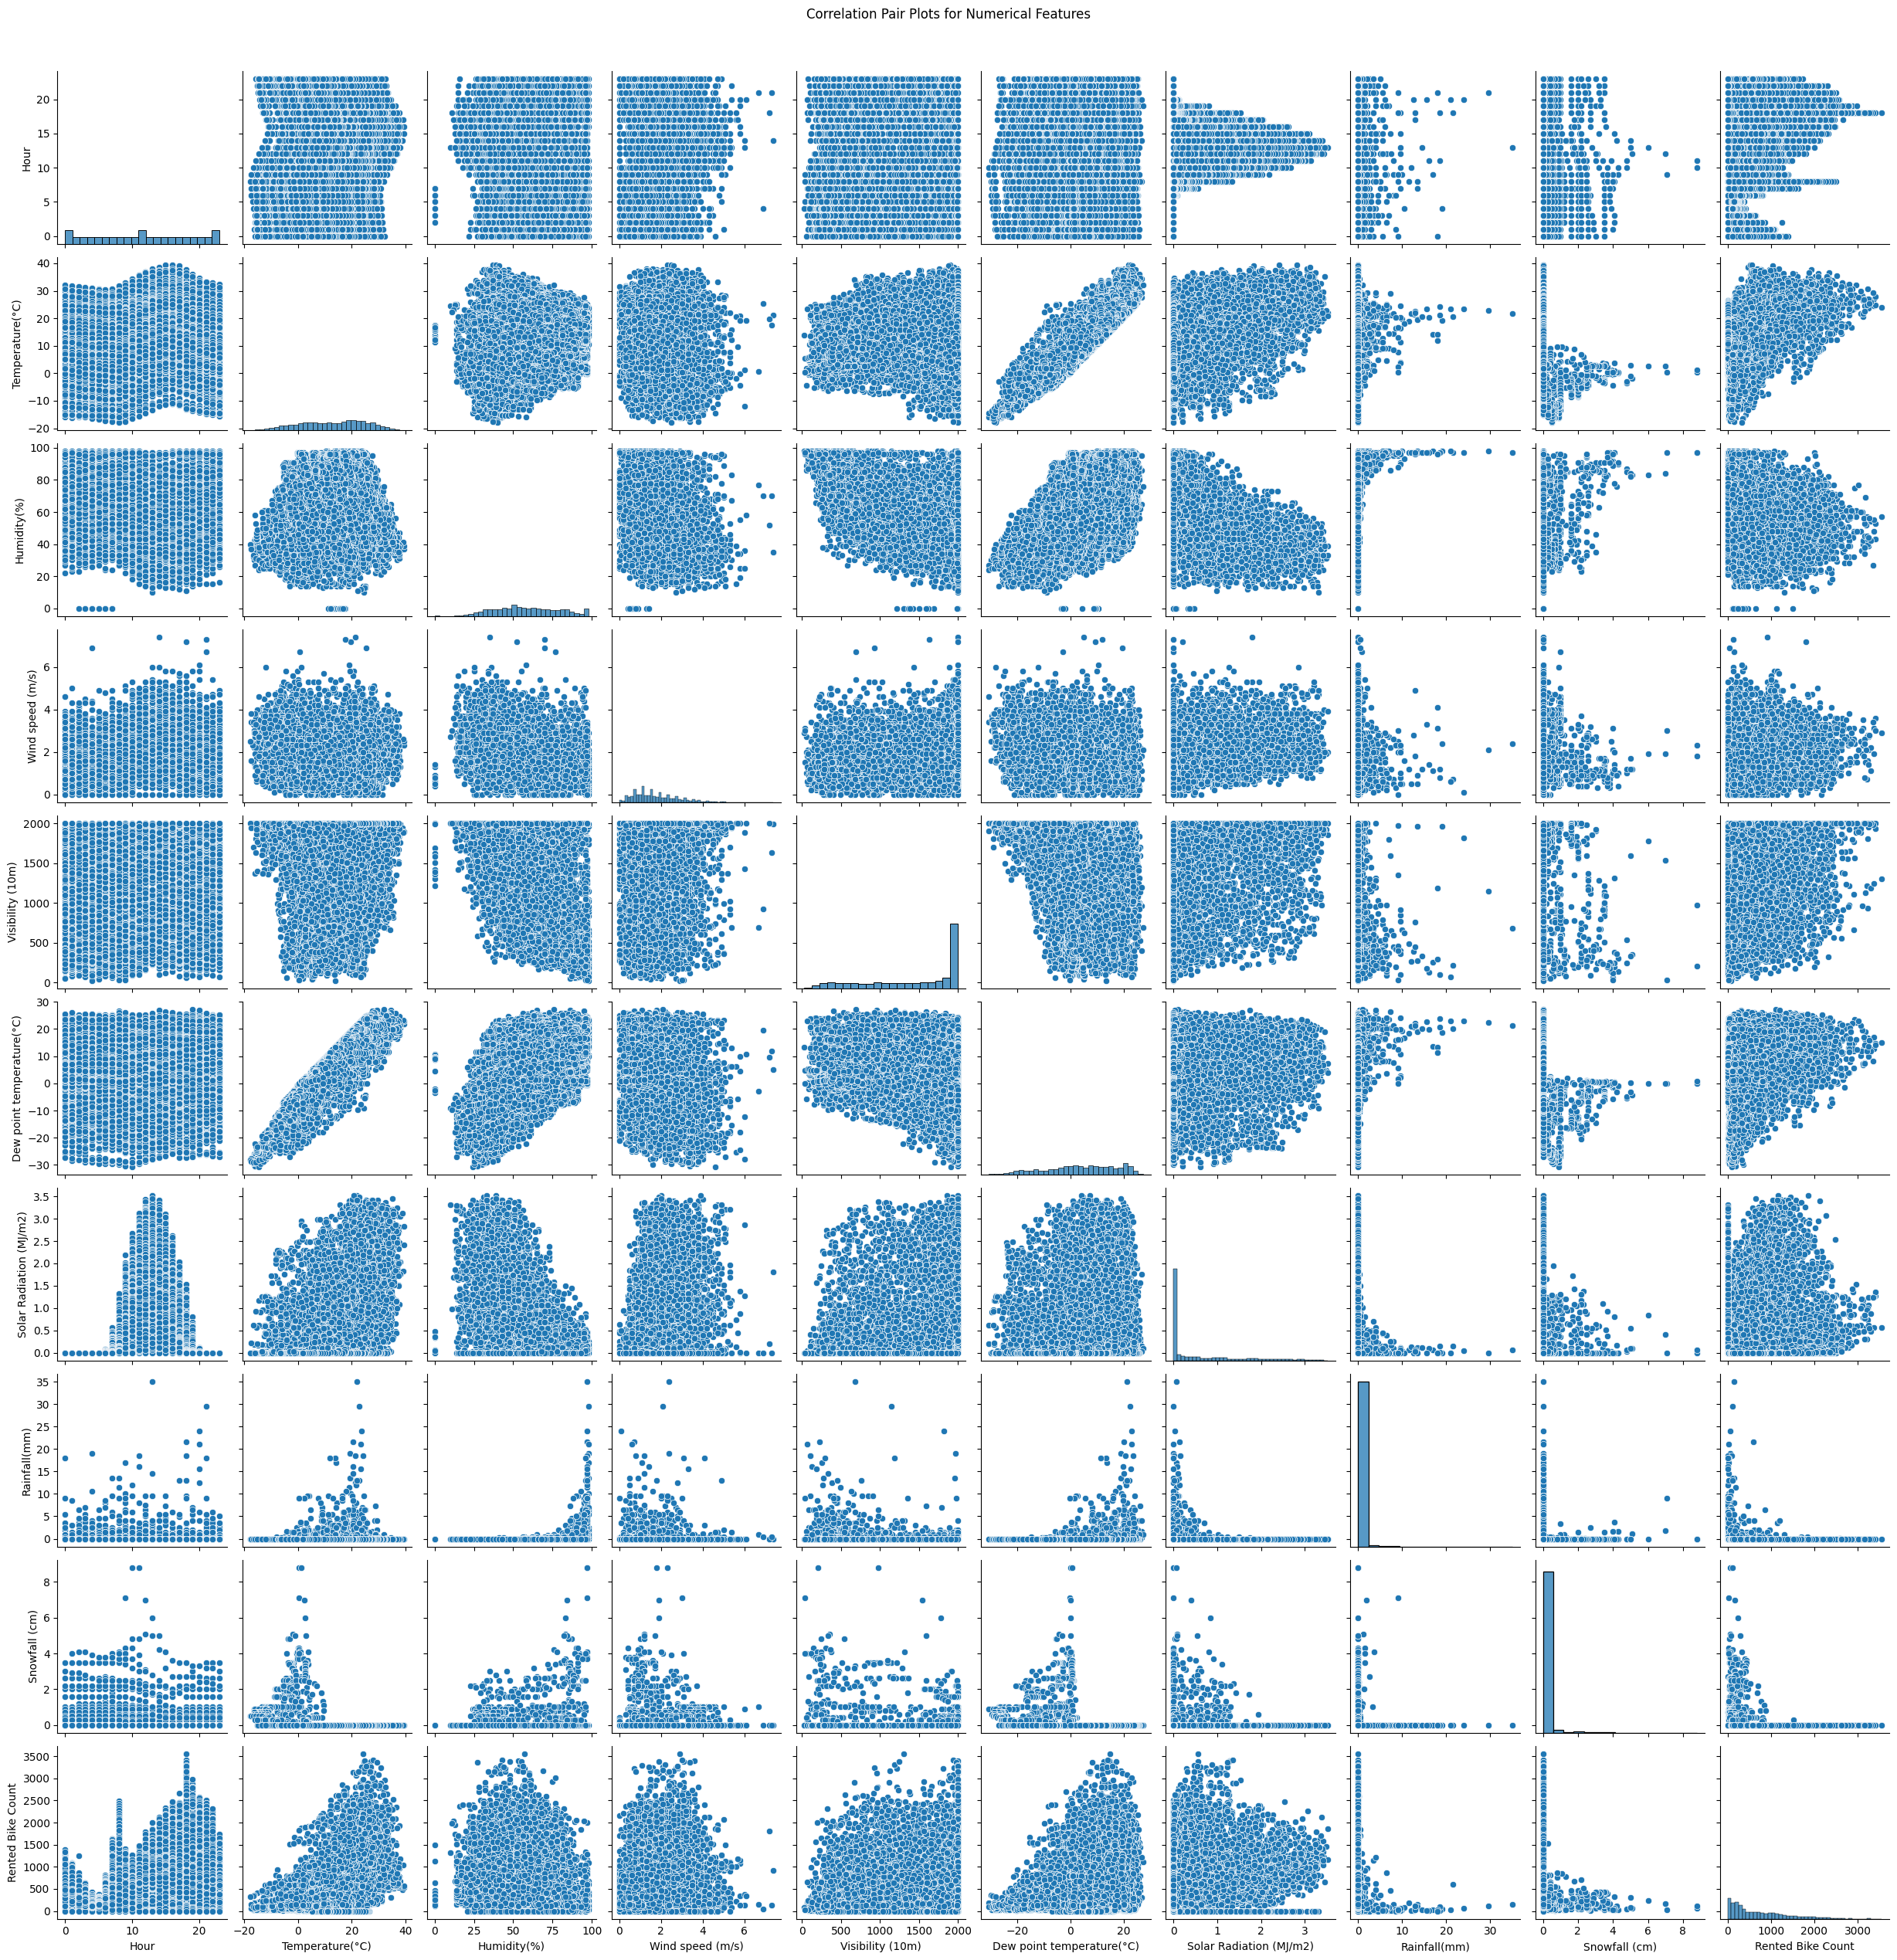

In [14]:
# Correlation pair plots for numerical features
plt.figure(figsize=(14, 10))
sns.pairplot(df[numerical_features + ['Rented Bike Count']], kind='scatter')
plt.suptitle('Correlation Pair Plots for Numerical Features', y=1.02)
plt.show()

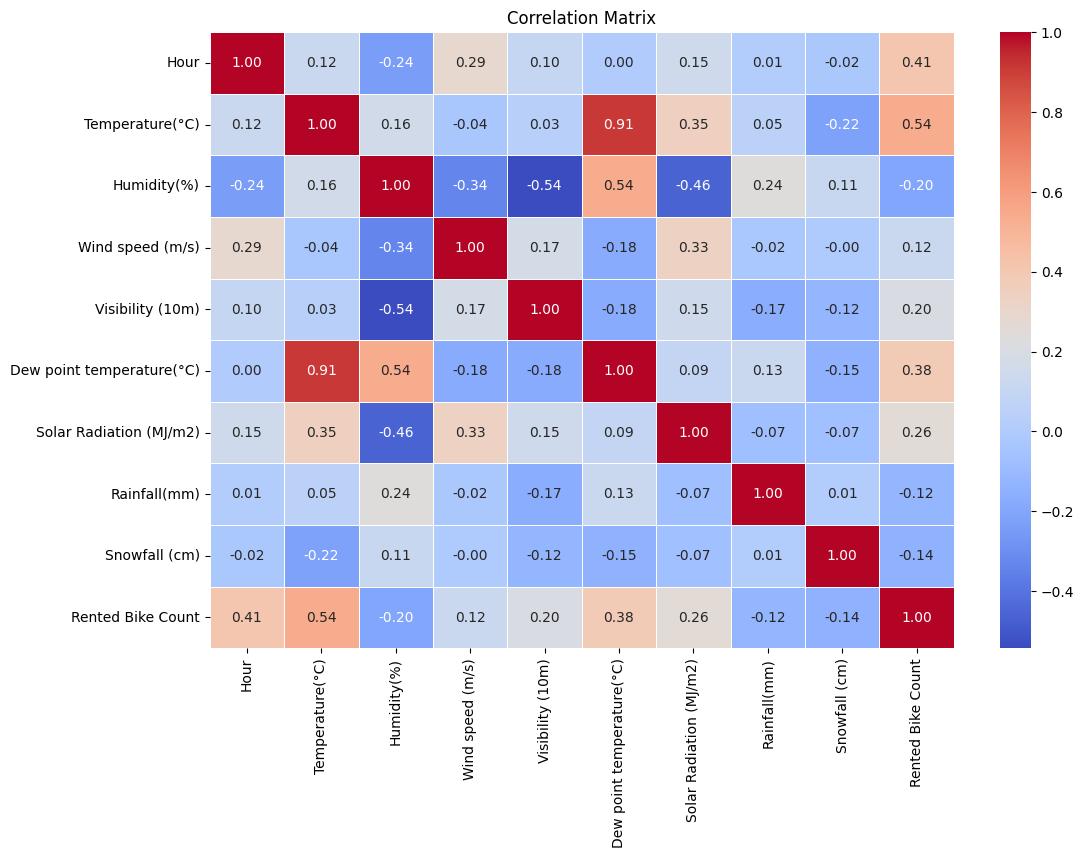

In [15]:
# Correlation matrix
correlation_matrix = df[numerical_features + ['Rented Bike Count']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## **3. Data preparation (Preparação dos dados)**

Link para a sessão: [OpenAI](https://chat.openai.com/share/13091052-6b2b-4094-97a4-74d753db9593)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
# Load your data
# Assuming your dataframe is named 'df'
# You may need to convert 'Date' column to datetime if it's not already
# df['Date'] = pd.to_datetime(df['Date'])

In [22]:

# Drop highly correlated features (e.g., dew point temperature)
df = df.drop('Dew point temperature(°C)', axis=1)

# Separate features (X) and target variable (y)
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # Drop first to avoid multicollinearity
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations to the training and testing sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [25]:
# Convert processed training data to DataFrame
columns = numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
X_train_processed_df = pd.DataFrame(X_train_processed, columns=columns)

# Display the first few rows of the processed data
X_train_processed_df.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0  0.505421         0.022370     0.137012          2.092940         -1.176113   
1 -0.363566         0.838222     1.359982         -0.029683         -1.472667   
2  1.084745        -0.145847    -0.596770         -0.319131         -0.930350   
3  1.664070        -1.306543     0.528362          0.259766         -0.004643   
4  1.519239         1.199888     0.724038         -0.222648         -0.707525   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons_Spring  \
0                 0.519701     -0.134019      -0.171026             0.0   
1                 0.210677     -0.134019      -0.171026             0.0   
2                -0.659168     -0.134019      -0.171026             0.0   
3                -0.659168     -0.134019      -0.171026             0.0   
4                -0.659168     -0.134019      -0.171026             0.0   

   Seasons_Summer  Seasons_Winter  Holiday_No Holiday  Functioning Day_Yes  
0             0.0             0.0                 1.0                  1.0  
1             1.0             0.0                 1.0                  1.0  
2             0.0             0.0                 1.0                  1.0  
3             0.0             1.0                 1.0                  1.0  
4             1.0             0.0                 1.0                  1.0

In [27]:
# Display statistical summary of the processed training data
X_train_processed_df.describe()

Hour  Temperature(°C)   Humidity(%)  Wind speed (m/s)  \
count  7.008000e+03     7.008000e+03  7.008000e+03      7.008000e+03   
mean   3.852829e-17     8.313999e-17 -1.977109e-17     -1.196405e-16   
std    1.000071e+00     1.000071e+00  1.000071e+00      1.000071e+00   
min   -1.667046e+00    -2.584992e+00 -2.847036e+00     -1.669891e+00   
25%   -7.980592e-01    -7.934818e-01 -7.924457e-01     -8.015456e-01   
50%    7.092757e-02     7.283518e-02 -5.866349e-02     -2.226485e-01   
75%    7.950832e-01     8.045787e-01  7.729564e-01      6.456971e-01   
max    1.664070e+00     2.226011e+00  1.947008e+00      5.469840e+00   

       Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
count      7.008000e+03             7.008000e+03  7.008000e+03   7.008000e+03   
mean       1.429602e-16             2.661494e-17  8.618170e-18  -2.230585e-17   
std        1.000071e+00             1.000071e+00  1.000071e+00   1.000071e+00   
min       -2.300068e+00            -6.591680e-01 -1.340192e-01  -1.710264e-01   
25%       -8.193470e-01            -6.591680e-01 -1.340192e-01  -1.710264e-01   
50%        4.295380e-01            -6.477227e-01 -1.340192e-01  -1.710264e-01   
75%        9.227021e-01             4.166929e-01 -1.340192e-01  -1.710264e-01   
max        9.227021e-01             3.369588e+00  3.266604e+01   1.932124e+01   

       Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
count     7008.000000     7008.000000     7008.000000         7008.000000   
mean         0.255422        0.250285        0.244150            0.949772   
std          0.436129        0.433208        0.429612            0.218431   
min          0.000000        0.000000        0.000000            0.000000   
25%          0.000000        0.000000        0.000000            1.000000   
50%          0.000000        0.000000        0.000000            1.000000   
75%          1.000000        1.000000        0.000000            1.000000   
max          1.000000        1.000000        1.000000            1.000000   

       Functioning Day_Yes  
count          7008.000000  
mean              0.966182  
std               0.180775  
min               0.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               1.000000

## **4. Modeling**

Link para a sessão: [OpenAI](https://chat.openai.com/share/903e06b4-6c53-4c70-a7df-2e4663c7e799)


Linear Regression Metrics:
Mean Squared Error (MSE): 194612.13570992782
Mean Absolute Error (MAE): 330.94941457997686
R-squared (R2): 0.5329079730077528


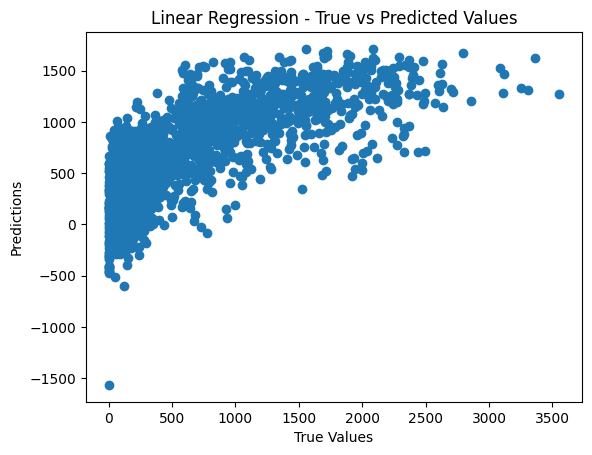


Ridge Regression Metrics:
Mean Squared Error (MSE): 194584.5054808086
Mean Absolute Error (MAE): 330.8962136683462
R-squared (R2): 0.5329742888090694


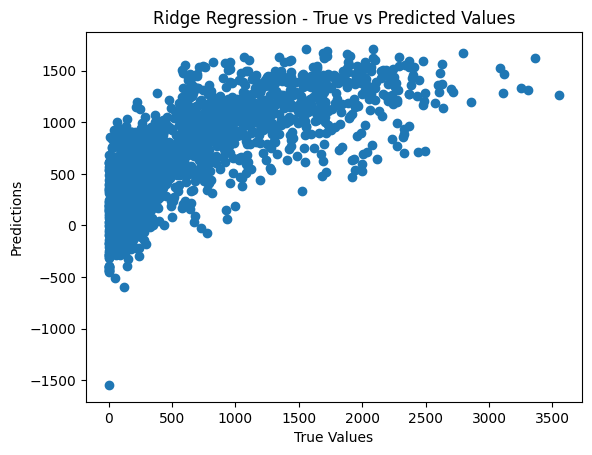


Lasso Regression Metrics:
Mean Squared Error (MSE): 194290.00148470607
Mean Absolute Error (MAE): 330.1904392276078
R-squared (R2): 0.5336811330559353


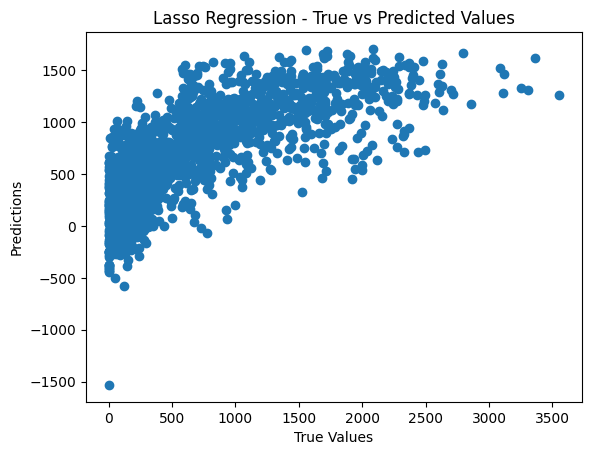


Random Forest Metrics:
Mean Squared Error (MSE): 57562.3762609589
Mean Absolute Error (MAE): 145.08131278538815
R-squared (R2): 0.8618435232307555


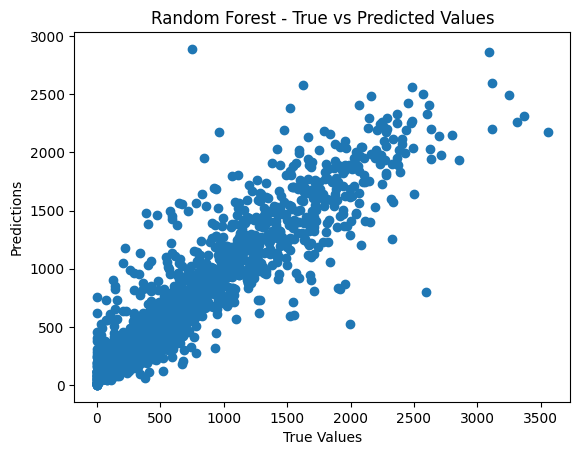


Gradient Boosting Metrics:
Mean Squared Error (MSE): 73311.23159270737
Mean Absolute Error (MAE): 177.74293478204515
R-squared (R2): 0.8240444171632977


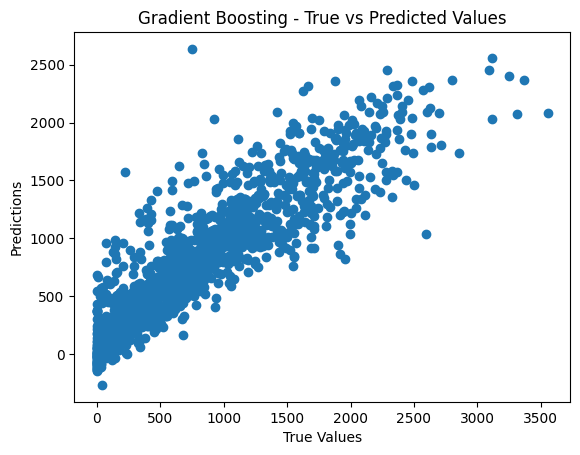


Support Vector Regression Metrics:
Mean Squared Error (MSE): 277146.5417922293
Mean Absolute Error (MAE): 357.8021653853459
R-squared (R2): 0.3348156860444953


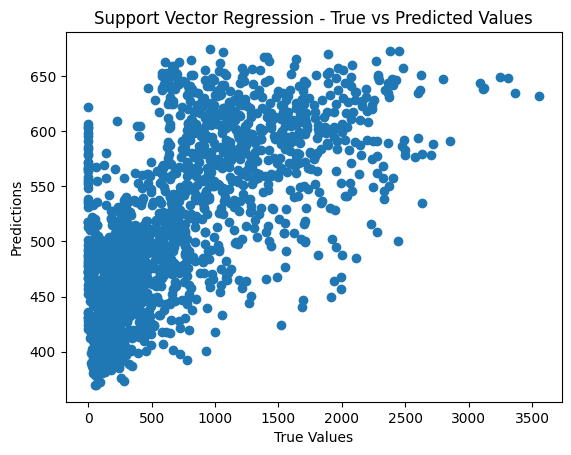


K-Nearest Neighbors Metrics:
Mean Squared Error (MSE): 95784.41267123287
Mean Absolute Error (MAE): 196.2222602739726
R-squared (R2): 0.7701061380079921


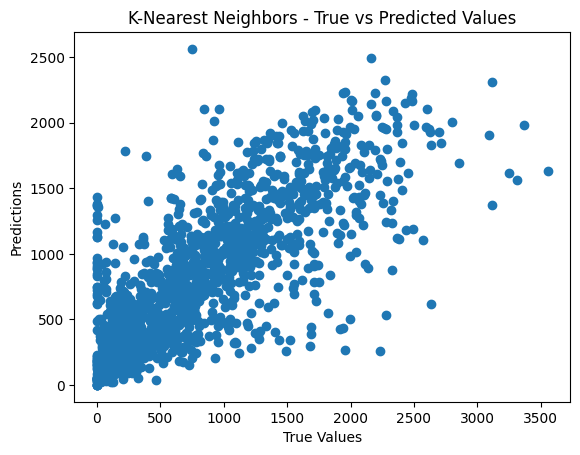

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Define a dictionary to store models and their corresponding names
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train_processed, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_processed)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")

    # Cross-validated predictions for a more robust evaluation
    y_cv_pred = cross_val_predict(model, X_test_processed, y_test, cv=5)
    
    # Scatter plot of true vs predicted values
    plt.scatter(y_test, y_cv_pred)
    plt.title(f'{name} - True vs Predicted Values')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()


In [30]:
##### CODIGO MANUAL
model = models['Random Forest']

## **5. Evaluation**

Link para a sessão: [OpenAI](https://chat.openai.com/share/d2a99aad-1dca-41db-91b4-01a3823c4ced)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on training set
y_train_pred = model.predict(X_train_processed)

# Predictions on test set
y_test_pred = model.predict(X_test_processed)

# Evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluation metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"R-squared (R2): {r2_train}")
print("\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R-squared (R2): {r2_test}")

# Additional visualizations or analysis can be performed as needed


Training Set Metrics:
Mean Squared Error (MSE): 7313.513710901826
Mean Absolute Error (MAE): 51.88476312785389
R-squared (R2): 0.982411240228777

Test Set Metrics:
Mean Squared Error (MSE): 57562.3762609589
Mean Absolute Error (MAE): 145.08131278538815
R-squared (R2): 0.8618435232307555


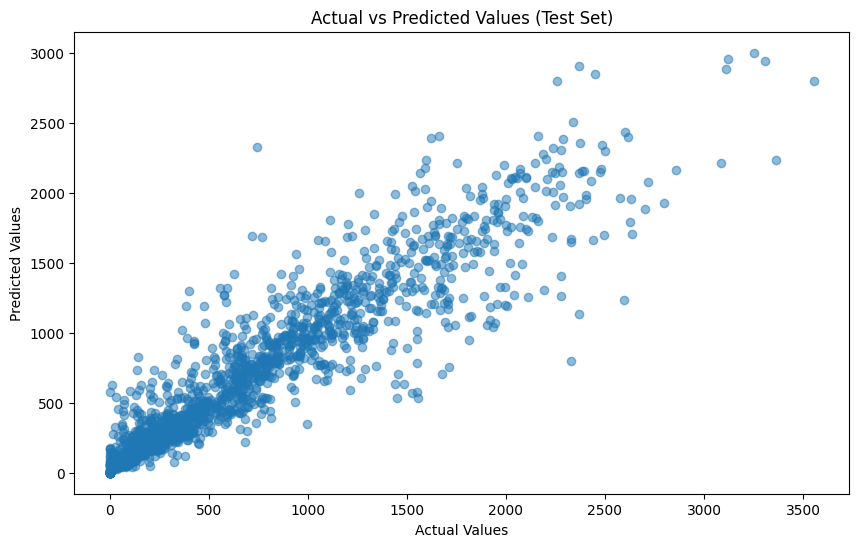

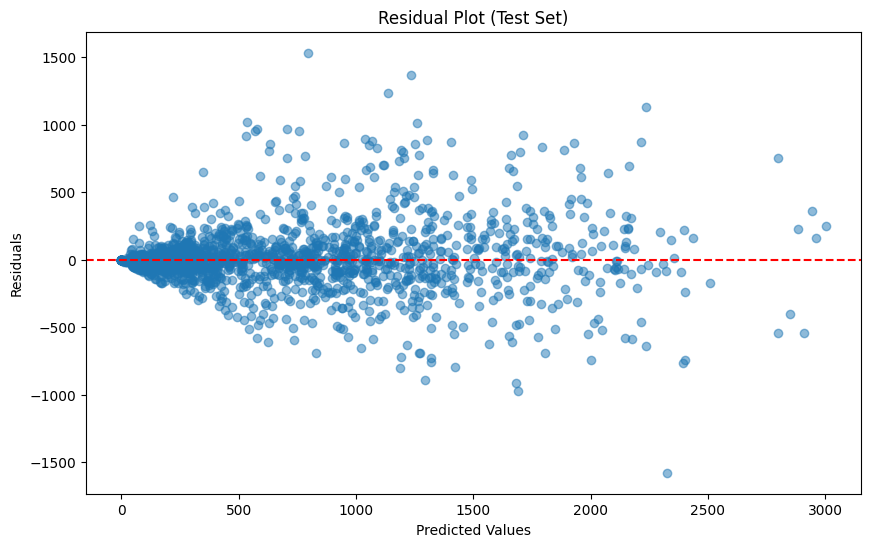

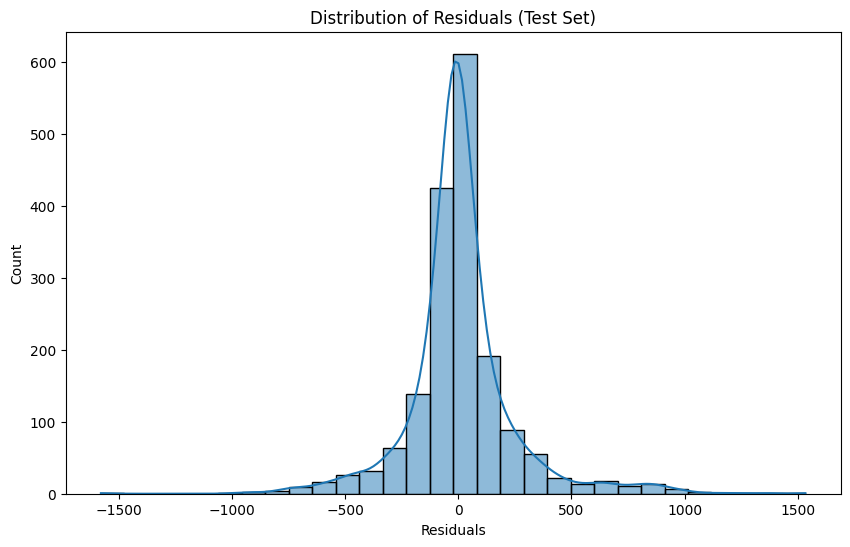

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title('Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot to check for heteroscedasticity
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.title('Residual Plot (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.show()


#### OBS:
A linha que atribui o valor à variavel "feature" names foi manualmente modificada, pois essa informação estava "lá atrás" e o ChatGPT precisaria ser manualmente instruído de qualquer forma.

/tmp/ipykernel_32709/2861445849.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


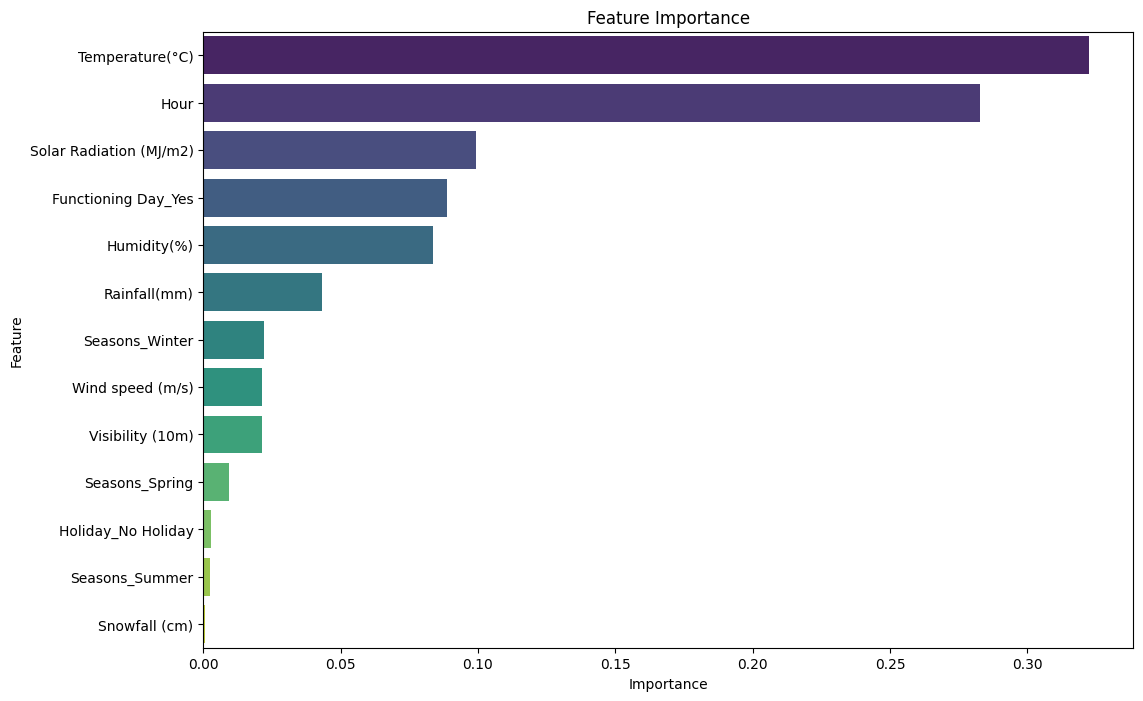

In [34]:
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = model.feature_importances_

# Get feature names from the processed data (assuming X_train_processed is a DataFrame)
feature_names = X_train_processed_df.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [40]:
X_train_processed_df.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes'],
      dtype='object')

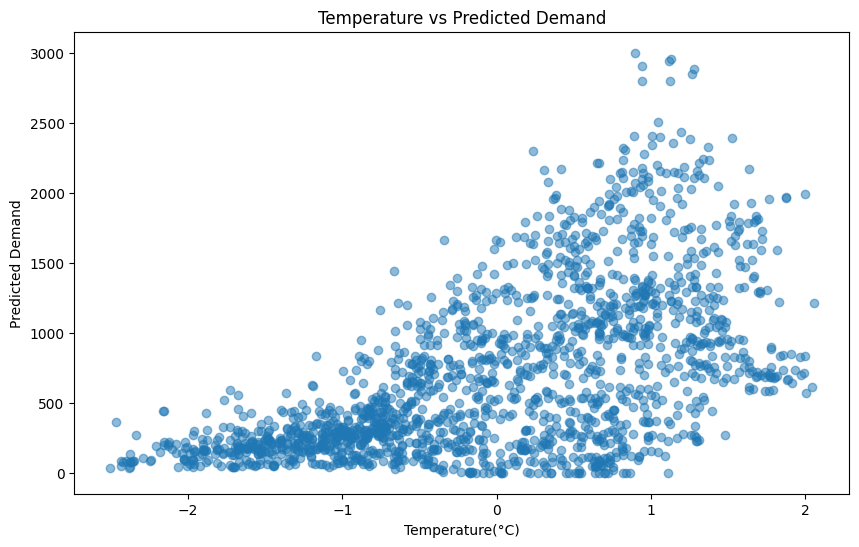

In [41]:
# Assuming X_train_processed_df and X_test_processed_df are DataFrames with the same columns

# Get feature names from the processed data
feature_names = X_train_processed_df.columns

# Find the index of the 'Temperature(°C)' feature
temperature_index = feature_names.get_loc('Temperature(°C)')

# Extract the temperature values from the test set
temperature_values_test = X_test_processed[:, temperature_index]

# Create a scatter plot with temperature on the x-axis and predicted demand on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(temperature_values_test, y_test_pred, alpha=0.5)
plt.title('Temperature vs Predicted Demand')
plt.xlabel('Temperature(°C)')
plt.ylabel('Predicted Demand')
plt.show()


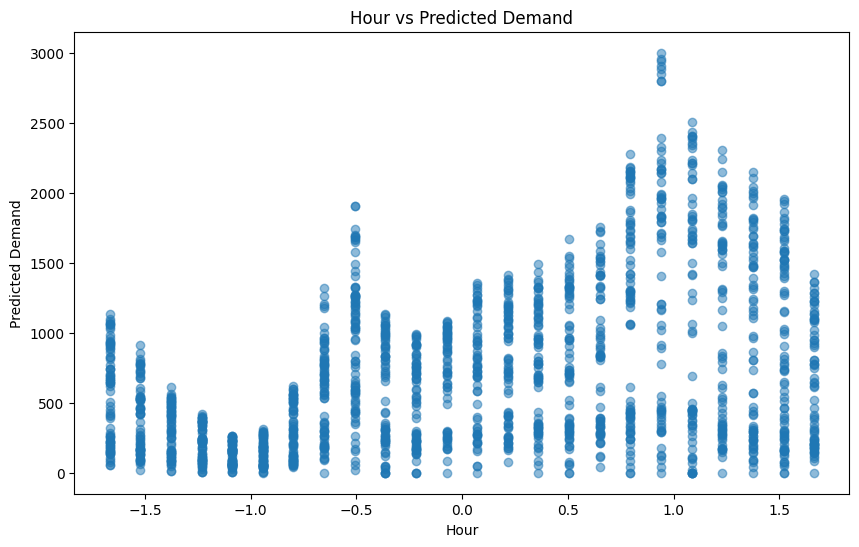

In [44]:
# Assuming X_test_processed_df is a DataFrame with the same columns

# Find the index of the 'Hour' feature
hour_index = feature_names.get_loc('Hour')

# Extract the hour values from the test set
hour_values_test = X_test_processed[:, hour_index]

# Create a scatter plot with hour on the x-axis and predicted demand on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(hour_values_test, y_test_pred, alpha=0.5)
plt.title('Hour vs Predicted Demand')
plt.xlabel('Hour')
plt.ylabel('Predicted Demand')
plt.show()


In [74]:
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
0                  2.2              2000                      0.0   
1                  0.8              2000                      0.0   
2                  1.0              2000                      0.0   
3                  0.9              2000                      0.0   
4                  2.3              2000                      0.0   
...                ...               ...                      ...   
8755               2.6              1894                      0.0   
8756               2.3              2000                      0.0   
8757               0.3              1968                      0.0   
8758               1.0              1859                      0.0   
8759               1.3              1909                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  
0              0.0            0.0  Winter  No Holiday             Yes  
1              0.0            0.0  Winter  No Holiday             Yes  
2              0.0            0.0  Winter  No Holiday             Yes  
3              0.0            0.0  Winter  No Holiday             Yes  
4              0.0            0.0  Winter  No Holiday             Yes  
...            ...            ...     ...         ...             ...  
8755           0.0            0.0  Autumn  No Holiday             Yes  
8756           0.0            0.0  Autumn  No Holiday             Yes  
8757           0.0            0.0  Autumn  No Holiday             Yes  
8758           0.0            0.0  Autumn  No Holiday             Yes  
8759           0.0            0.0  Autumn  No Holiday             Yes  

[8760 rows x 13 columns]

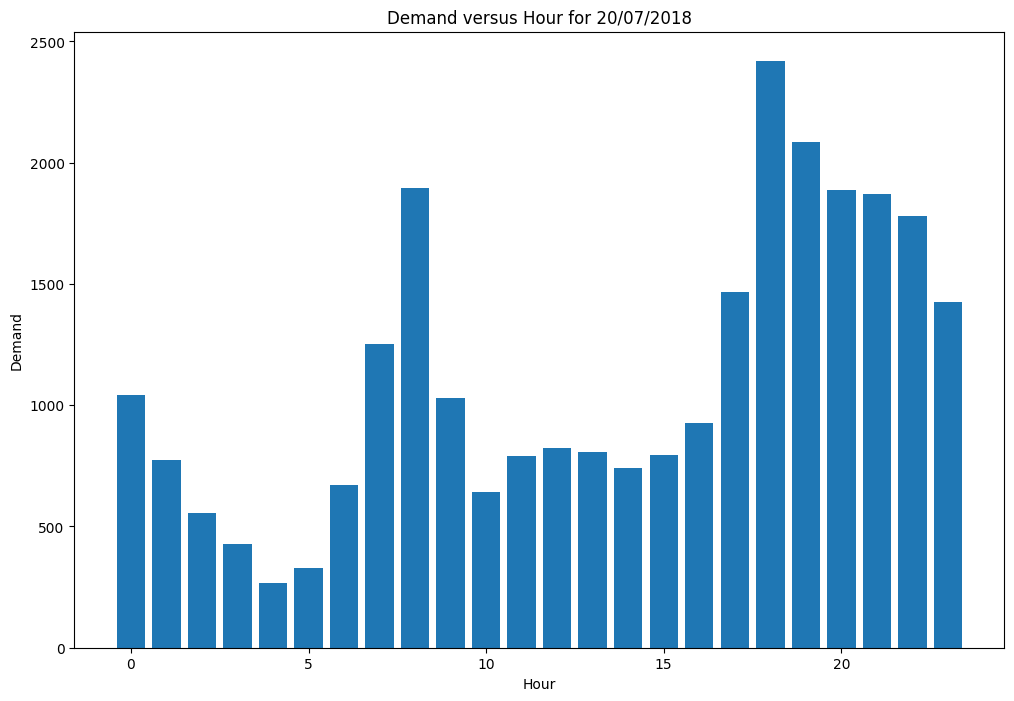

In [77]:
import random
import matplotlib.pyplot as plt

def plot_demand_hour_relationship(df):
    # Randomly select a unique date
    random_date = random.choice(df['Date'].unique())

    # Filter the DataFrame for the selected date
    selected_day = df[df['Date'] == random_date]

    # Extract 'Hour' and 'Rented bike count' values for the selected day
    hour_values = selected_day['Hour']
    demand_values = selected_day['Rented Bike Count']

    # Plot demand versus hour using a bar plot
    plt.figure(figsize=(12, 8))
    plt.bar(hour_values, demand_values)
    plt.title(f'Demand versus Hour for {random_date}')
    plt.xlabel('Hour')
    plt.ylabel('Demand')
    plt.show()

# Example usage:
plot_demand_hour_relationship(df)


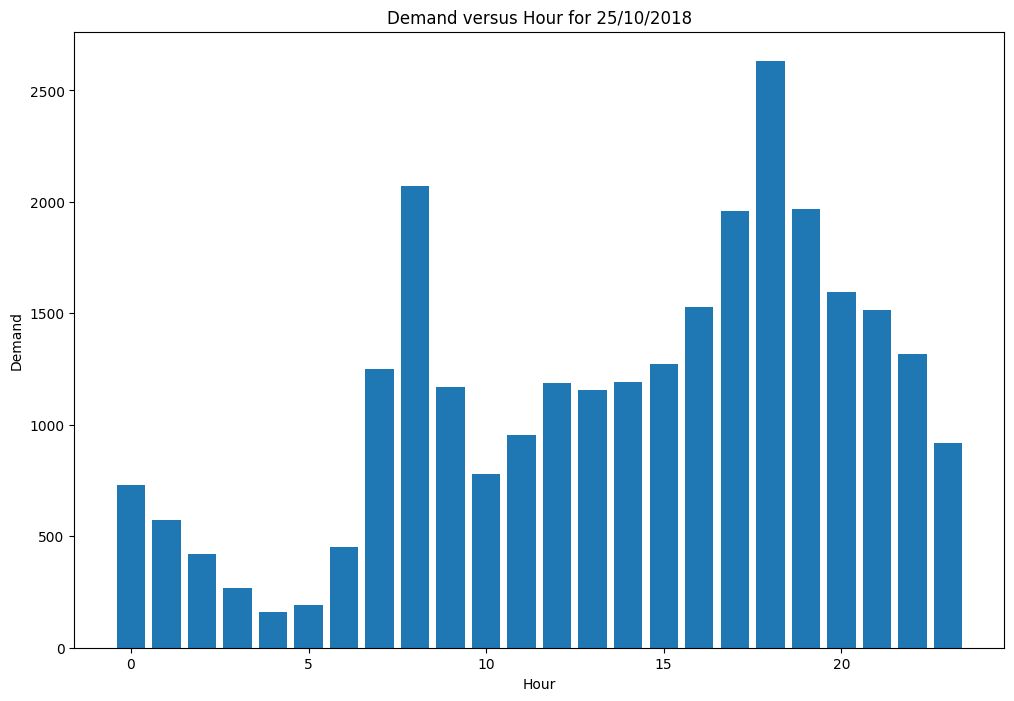

In [78]:
plot_demand_hour_relationship(df)

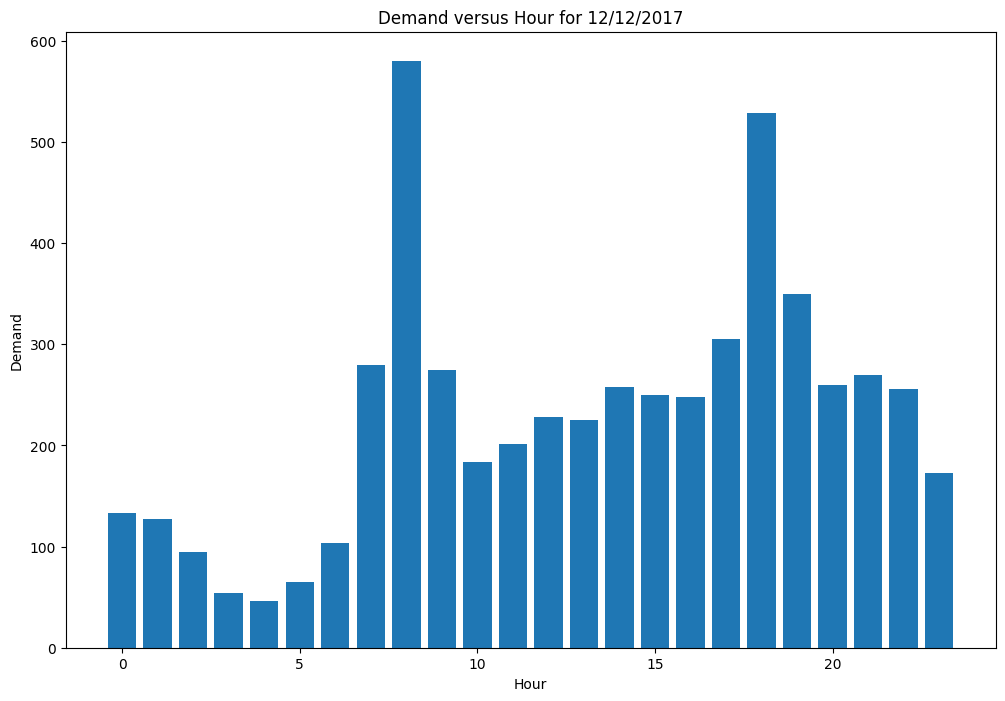

In [79]:
plot_demand_hour_relationship(df)
